In [52]:
#Instalamos libreria para análisis de variables categóricas
%pip install funpymodeling

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [54]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer=pd.read_excel('microretailer_mit_lift_lab.xlsx')

In [55]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [56]:
#
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,268_number_fridges,184_store_devices,104_how_many_shelves_does_the_micro_retailer_have,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,2_current_permanent_employees,4_number_permanent_employees_last_year,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,19_tax_id,145_number_direct_competitors,310_burnout,24_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,...,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,172_supplier_frequency,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,163_number_high_perishable_products,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,yes,no,no,2,0.0,POS system (i.e. computer + bar code scanner +...,4,NaN,yes,yes,2021-04-12,2.0,2.0,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,NaN,NaN,yes,3.0,no,NaN,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,yes,0,4.0,Dataphone (i.e. card payments),8,NaN,yes,yes,2012-08-12,1.0,1.0,Aumentó 15%,No cambió,yes,No lo hago,No lo hago,NaN,NaN,no,4.0,no,NaN,yes,WhatsApp,"Efectivo,Transferencia interbancaria",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transferencia interbancaria,no,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",10%,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanosto

In [57]:
#Limitar numero máximo de columnas
pd.options.display.max_rows = None

In [81]:
#Obtengo un analis univariado de las variables categóricas
freq_tbl(Micro_Retailer)

                               _record_id  ...  cumulative_perc
0    dff2998e-af74-4de6-8efd-488aca24e67b  ...         0.005848
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc  ...         0.011696
2    af5c48b5-a916-47a6-aacc-1128ea1e728e  ...         0.017544
3    4790411b-df1d-44f0-a659-6d99e26ae765  ...         0.023392
4    e70db20a-25db-412b-9a71-7df285c92a3d  ...         0.029240
5    6311502b-fa7b-45fc-817f-c229447b7fe1  ...         0.035088
6    ea013169-99dd-4027-ac70-91c66161a1a5  ...         0.040936
7    fa403799-e3d6-427b-accc-4160832a263b  ...         0.046784
8    b2783738-b018-49e2-849d-da909ee5058a  ...         0.052632
9    9c4c7985-fc20-4d2a-ae51-a65c584f14eb  ...         0.058480
10   c67ce802-7010-4d33-950d-48902e5c7de2  ...         0.064327
11   67df942e-bcee-47c2-aee4-bb51d2d741c1  ...         0.070175
12   adadd94c-68ad-4bfa-a816-ba4c46a8a781  ...         0.076023
13   93e02631-440e-466f-b05d-69e301fbaab0  ...         0.081871
14   0591b725-62b4-4871-b3c5-ccbff36ca57

In [59]:
#Obtengo un análisis univariado de una variable categórica en específico
table1 = freq_tbl(Micro_Retailer['214_customer_relationship_tools'])
table1

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,27,0.157895,0.284211
1,Aplicación móvil,21,0.122807,0.505263
2,Ninguna,20,0.116959,0.715789
3,"Aplicación móvil,Redes sociales",13,0.076023,0.852632
4,Cuaderno,6,0.035088,0.915789
5,Teléfono,1,0.005848,0.926316
6,"Cuaderno,Redes sociales",1,0.005848,0.936842
7,"Aplicación móvil,De frente",1,0.005848,0.947368
8,Físico,1,0.005848,0.957895
9,"Aplicación móvil,Ninguna",1,0.005848,0.968421


In [60]:
#Obtengo un filtro de los valores más relevantes de las variables categóricas seleccionadas más significativas
Filtro = table1[table1['frequency']>1]
Filtro

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,27,0.157895,0.284211
1,Aplicación móvil,21,0.122807,0.505263
2,Ninguna,20,0.116959,0.715789
3,"Aplicación móvil,Redes sociales",13,0.076023,0.852632
4,Cuaderno,6,0.035088,0.915789


In [61]:
#Ajusto el indice de mi DataFrame
Filtro_index=Filtro.set_index('214_customer_relationship_tools')
Filtro_index

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Redes sociales,27,0.157895,0.284211
Aplicación móvil,21,0.122807,0.505263
Ninguna,20,0.116959,0.715789
"Aplicación móvil,Redes sociales",13,0.076023,0.852632
Cuaderno,6,0.035088,0.915789


In [62]:
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency= Filtro_index.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index_frequency

,frequency
214_customer_relationship_tools,
Redes sociales,27
Aplicación móvil,21
Ninguna,20
"Aplicación móvil,Redes sociales",13
Cuaderno,6


Text(0, 0.5, 'Frecuencia')

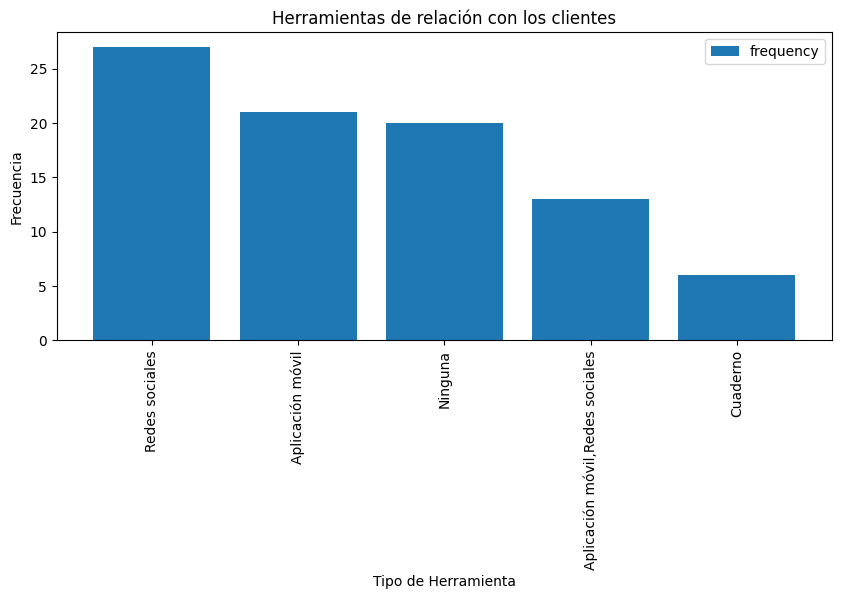

In [63]:
#Realizamos gráfico de barras del dataframe filtrado
Filtro_index_frequency.plot(kind='bar', width=0.8, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

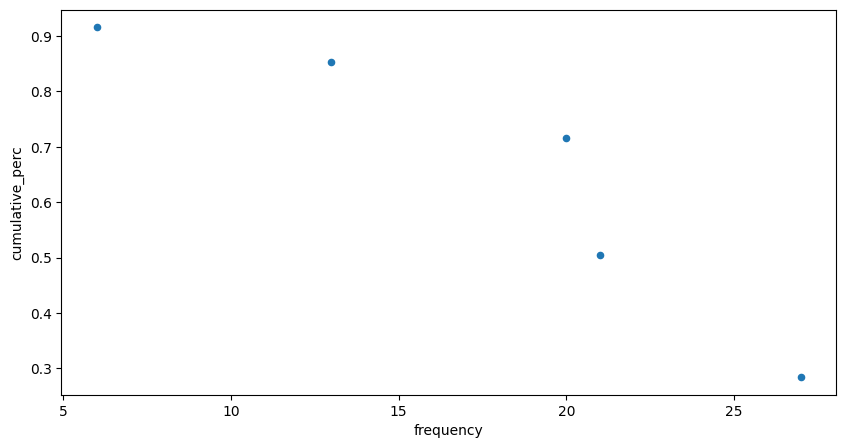

In [64]:
#Realizamos grafico de dispersión del DataFrame filtrado
Filtro_index.plot("frequency", "cumulative_perc", kind="scatter", figsize=(10,5))

<Axes: xlabel='214_customer_relationship_tools'>

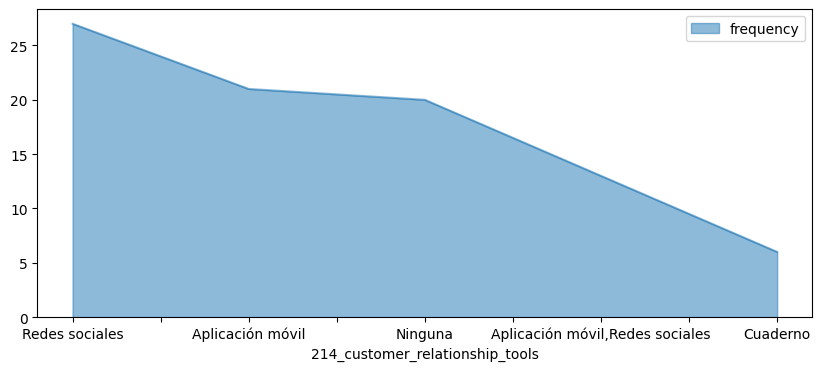

In [65]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index_frequency.plot(kind='area', figsize=(10,4), alpha= 0.5)

<Axes: ylabel='frequency'>

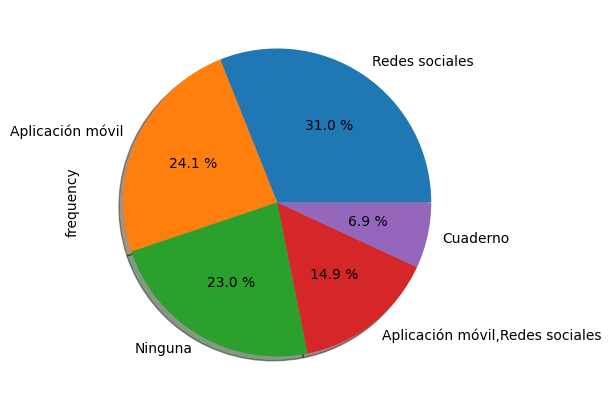

In [66]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

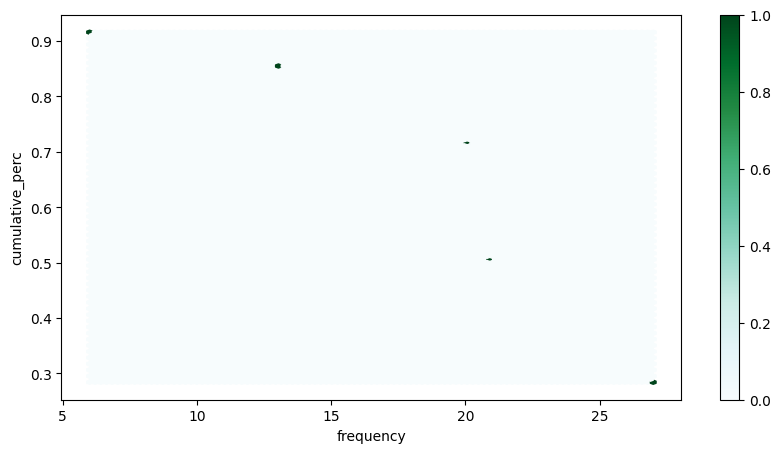

In [67]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

Actividad 5 (Extracción de Características)

In [68]:
#Obtengo un análisis univariado de una variable categórica en específico
table2 = freq_tbl(Micro_Retailer['312_payment_of_utilities'])
table2

,312_payment_of_utilities,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,46,0.269006,0.696970
1,Totalmente de acuerdo,9,0.052632,0.833333
2,Algo de acuerdo,5,0.029240,0.909091
3,Ni de acuerdo ni en desacuerdo,4,0.023392,0.969697
4,Algo en desacuerdo,2,0.011696,1.000000


In [82]:
#Obtengo un filtro de los valores más relevantes de las variables categóricas seleccionadas más significativas
Filtro1 = table2[table2['frequency']>2]
Filtro1

,312_payment_of_utilities,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,46,0.269006,0.696970
1,Totalmente de acuerdo,9,0.052632,0.833333
2,Algo de acuerdo,5,0.029240,0.909091
3,Ni de acuerdo ni en desacuerdo,4,0.023392,0.969697


In [83]:
#Ajusto el indice de mi DataFrame
Filtro_index1=Filtro1.set_index('312_payment_of_utilities')
Filtro_index1

,frequency,percentage,cumulative_perc
312_payment_of_utilities,,,
Totalmente en desacuerdo,46,0.269006,0.696970
Totalmente de acuerdo,9,0.052632,0.833333
Algo de acuerdo,5,0.029240,0.909091
Ni de acuerdo ni en desacuerdo,4,0.023392,0.969697


In [84]:
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency1= Filtro_index1.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index_frequency1

,frequency
312_payment_of_utilities,
Totalmente en desacuerdo,46
Totalmente de acuerdo,9
Algo de acuerdo,5
Ni de acuerdo ni en desacuerdo,4


Text(0, 0.5, 'Frecuencia')

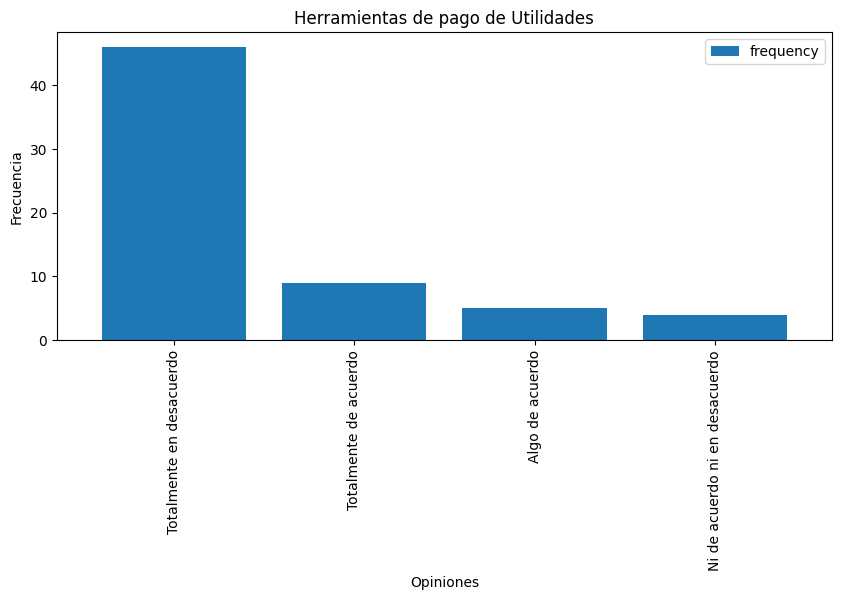

In [85]:
#Realizamos gráfico de barras del dataframe filtrado
Filtro_index_frequency1.plot(kind='bar', width=0.8, figsize=(10,4))
plt.title('Herramientas de pago de Utilidades')
plt.xlabel('Opiniones')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

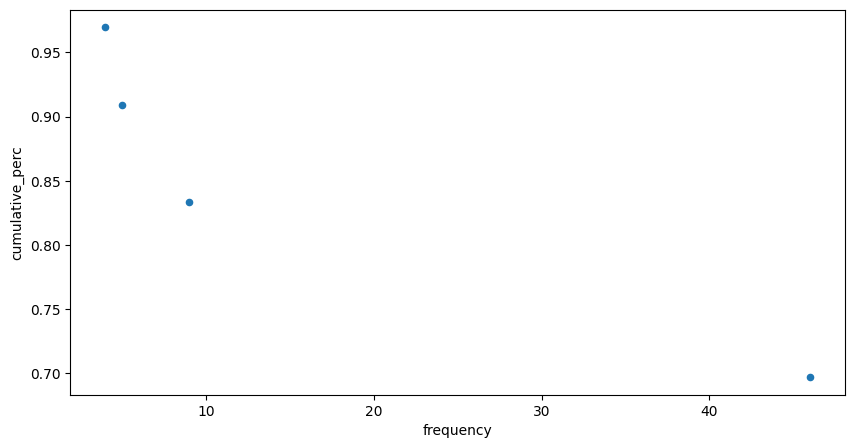

In [86]:
#Realizamos grafico de dispersión del DataFrame filtrado
Filtro_index1.plot("frequency", "cumulative_perc", kind="scatter", figsize=(10,5))

<Axes: xlabel='312_payment_of_utilities'>

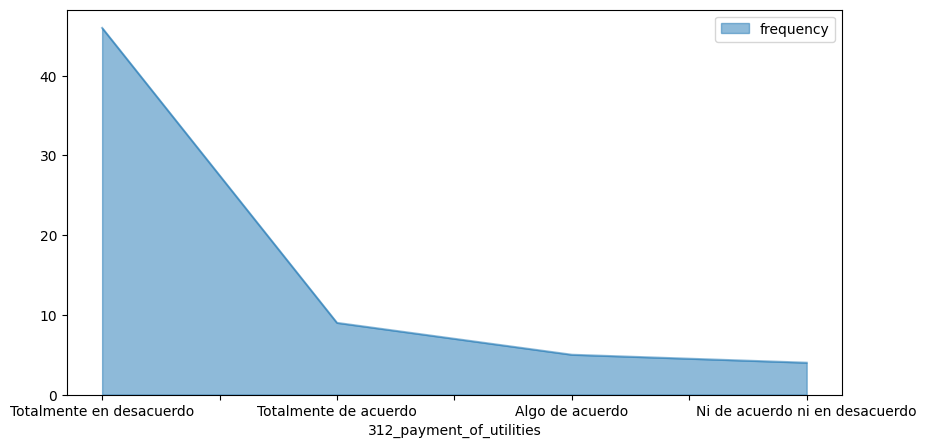

In [89]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index_frequency1.plot(kind='area', figsize=(10,5), alpha= 0.5)

<Axes: ylabel='frequency'>

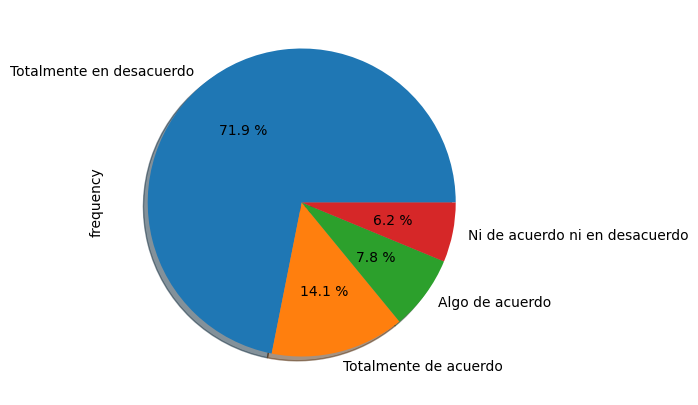

In [90]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index1["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

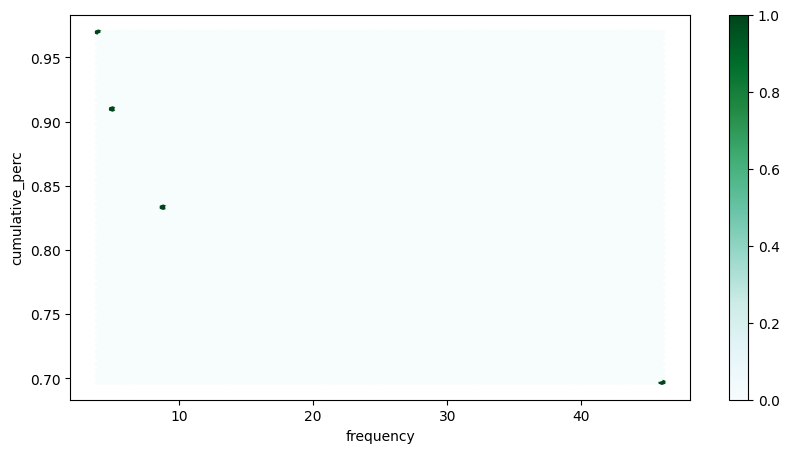

In [91]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro_index1.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))